**De Bruijn Graphs**

**2.1) Generated Unique Data filename as 1002059166.txt in cmd**

**2.2) Generating K-mers**


In [1]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# List of reads
with open("1002059166.txt") as file:
    reads = file.read().strip().split()

# Generating kmers and storing them in kmers.txt
k = 3  # k-mer length
with open("kmers.txt", "w") as file:
    for read in reads:
        for i in range(len(read) - k + 1):
            kmer = read[i:i+k]
            prefix = kmer[:-1]
            suffix = kmer[1:]
            if len(prefix) == k-1 and len(suffix) == k-1:  
                file.write(prefix + "\n" + suffix + "\n")


**2.3) Generating a De Bruijn Graph**

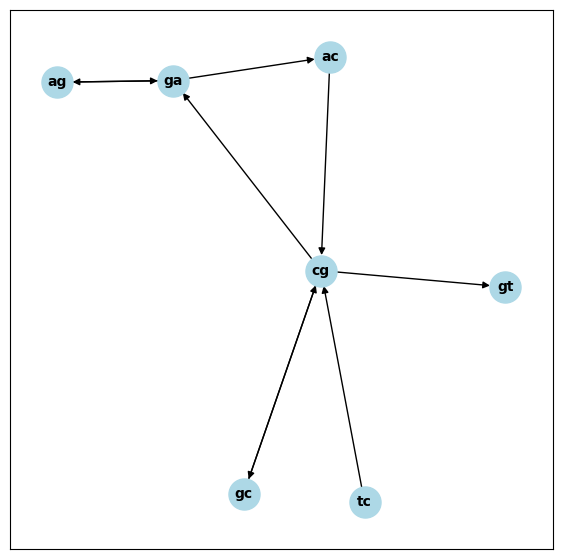

In [2]:
# Generate the De Bruijn graph
import matplotlib.pyplot as plt

graph = nx.DiGraph()
with open("kmers.txt") as file:
    kmers = [line.strip() for line in file if line.strip()]
    
    suffix = []
    prefix = []
    for line in kmers:
        line = line.strip()
        if line:
            if len(suffix) < len(prefix):
                suffix.append(line)
            else:
                prefix.append(line)
        if len(prefix) == len(suffix):
            current_prefix = prefix[0]
            prefix = prefix[1:]
            current_suffix = suffix[0]
            suffix = suffix[1:]
            if graph.has_edge(current_prefix, current_suffix):
                graph[current_prefix][current_suffix]['weight'] += 1
            else:
                graph.add_edge(current_prefix, current_suffix, weight=1)

# Create a graph using networkx
G = nx.DiGraph(graph)
plt.figure(figsize=(7, 7))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', font_color='black')
# Save the plot
plt.savefig("De_Bruijn_Graph.png")
plt.show()


**2.4) Eulerian Cycles**

**The below graph has a Eulerian Cycle**

In [3]:

# Calculate in-degree and out-degree of each node
in_degree = dict(graph.in_degree())
out_degree = dict(graph.out_degree())

# Check if graph has an Eulerian cycle
odd_degree_count = 0
for node in graph.nodes:
    if in_degree[node] != out_degree[node]:
        odd_degree_count += 1
        if odd_degree_count > 2:
            eulerian_cycle = False
            break
else:
    eulerian_cycle = True


# Print results
print("In-degree:", in_degree)
print("Out-degree:", out_degree)
if eulerian_cycle:
    print("The graph has an Eulerian cycle.")
else:
    print("The graph does not have an Eulerian cycle.")


In-degree: {'ga': 2, 'ac': 1, 'cg': 3, 'gc': 1, 'gt': 1, 'tc': 0, 'ag': 1}
Out-degree: {'ga': 2, 'ac': 1, 'cg': 3, 'gc': 1, 'gt': 0, 'tc': 1, 'ag': 1}
The graph has an Eulerian cycle.


**2.5) Generating an Assembly**

**The assembled genome sequence would be: " TCGAGACGCGT "**